# 시계열 예측 문제
- 사인파형 시계열을 입력으로 다음 스텝의 출력을 예측
- 3개의 순서열을 입력한 후 출력값이 target과 일치하게 만듦

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

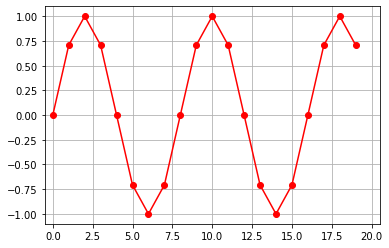

In [2]:
s = np.sin(2 * np.pi * 0.125 * np.arange(20))
plt.plot(s, 'ro-')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.grid()
plt.show()

### 원래의 시계열 벡터를 Toeplitz 행렬 형태로 변환
(대각선 위의 성분들이 같은 정사각 행렬)

In [3]:
from scipy.linalg import toeplitz
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0] - 2)], s[::-1]))
S[:5, :3]

array([[ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.22464680e-16],
       [ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01],
       [ 1.22464680e-16, -7.07106781e-01, -1.00000000e+00]])

In [4]:
S.shape

(19, 20)

In [5]:
X_train = S[:-1, :3][:, :, np.newaxis]
Y_train = S[:-1, 3]
X_train.shape, Y_train.shape

((18, 3, 1), (18,))

In [6]:
X_train[:3]

array([[[0.00000000e+00],
        [7.07106781e-01],
        [1.00000000e+00]],

       [[7.07106781e-01],
        [1.00000000e+00],
        [7.07106781e-01]],

       [[1.00000000e+00],
        [7.07106781e-01],
        [1.22464680e-16]]])

In [7]:
Y_train[:3]

array([ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01])

### 모델 정의
- SimpleRNN

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [10]:
model = Sequential([
                    SimpleRNN(10, input_shape=(3, 1)),
                    Dense(1, activation='linear')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='mse', optimizer='sgd')

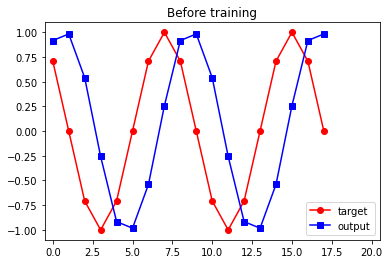

In [12]:
plt.plot(Y_train, 'ro-', label='target')
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label='output')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title('Before training')
plt.show()

In [13]:
history = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 898ms/step - loss: 0.7490
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 0.5908
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4743
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3871
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 0.3209
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2700
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2304
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 0.1991
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1743
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 0.1542
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1377
Epoch 12/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1241
Epoch 13/100
1/1 [==============================] - 0s 13

### 결과 확인

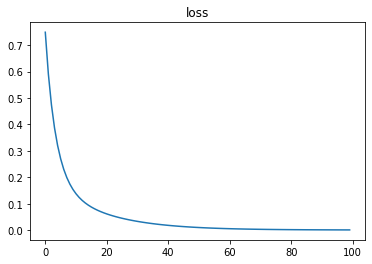

In [14]:
plt.plot(history.history['loss'])
plt.title('loss')
plt.show()

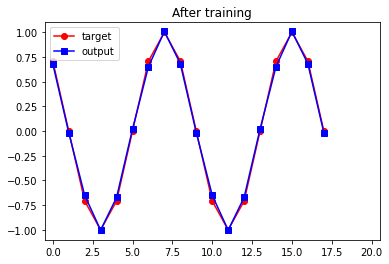

In [15]:
plt.plot(Y_train, 'ro-', label='target')
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label='output')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title('After training')
plt.show()

In [16]:
# 입력에 대한 weights
model.weights[0]

<tf.Variable 'simple_rnn/simple_rnn_cell/kernel:0' shape=(1, 10) dtype=float32, numpy=
array([[ 0.10813192, -0.45207852, -0.3103757 , -0.11725643,  0.07662953,
        -0.12669197,  0.17407289,  0.71127635, -0.41888142, -0.23619102]],
      dtype=float32)>

In [17]:
# 유닛에 대한 weights
model.weights[1]

<tf.Variable 'simple_rnn/simple_rnn_cell/recurrent_kernel:0' shape=(10, 10) dtype=float32, numpy=
array([[-2.4015881e-01,  4.1551495e-01, -3.3612186e-01, -3.8622823e-01,
         2.0493390e-01, -8.5867837e-02, -5.2413523e-01,  1.6422331e-01,
        -3.0531651e-01, -1.9488136e-01],
       [-1.2756622e-01,  5.1692195e-02, -8.6218148e-02,  1.6519408e-01,
        -1.2821004e-02, -2.4812481e-01,  4.4447759e-01,  8.1354189e-01,
         2.8474262e-04, -3.1118312e-01],
       [ 5.0894994e-01, -4.0328553e-01,  4.3860224e-01, -8.1563778e-02,
         2.1825431e-01, -2.4515362e-01, -4.3914887e-01,  2.8150985e-01,
         1.3463238e-01, -3.7630999e-01],
       [ 1.8368377e-01, -8.7320790e-02,  4.8775550e-02, -5.9196287e-01,
        -1.7825329e-01, -4.8739713e-01,  4.2388561e-01, -2.0265359e-01,
        -3.6213085e-01, -3.7320133e-02],
       [ 1.1791491e-01,  4.9734366e-01,  3.3153740e-01,  4.0023449e-01,
         3.3777598e-01, -5.6805593e-01,  1.7522583e-02, -1.3048105e-01,
         3.4929644

In [18]:
# bias
model.weights[2]

<tf.Variable 'simple_rnn/simple_rnn_cell/bias:0' shape=(10,) dtype=float32, numpy=
array([-3.0561371e-04, -2.5733348e-06,  1.8353252e-03,  7.2334973e-05,
        1.4306061e-03,  3.6687136e-04, -2.5204197e-04, -2.4197923e-03,
        1.5532835e-03, -3.1406229e-04], dtype=float32)>

In [19]:
# Output layer에 대한 weights
model.weights[3]

<tf.Variable 'dense/kernel:0' shape=(10, 1) dtype=float32, numpy=
array([[ 0.5240259 ],
       [-0.26450396],
       [ 0.38532302],
       [ 0.2503889 ],
       [ 0.6452001 ],
       [-0.63857186],
       [-0.6356744 ],
       [ 0.6790521 ],
       [-0.27262923],
       [ 0.64437914]], dtype=float32)>

In [ ]:
# Output layer에 대한 bias
model.weights[4]